<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS5: Estimación Espectral
#### Eloy Silva

### Configuración e inicio de la simulación

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,7)

import warnings
warnings.filterwarnings('ignore')
 
N = 1000    #Cantidad de muestras
fs = N
R = 200     #Cantidad de realizaciones

a1 = 2              #Amplitud de la señal original
SNR_db = [3, 10]    #Relación señal a ruido

fr = np.random.uniform(-0.5, 0.5, R)
w0 = 2*np.pi*(N/4)
w1 = w0 + fr*((2*np.pi)/N)          #Frecuencia de señal

k = np.arange(0, N/fs, 1/fs)        #Vector de tiempo

s = np.zeros((N, R))
n = np.zeros((N, R))

### Generación de señal analógica y ruido. Cálculo de espectros.

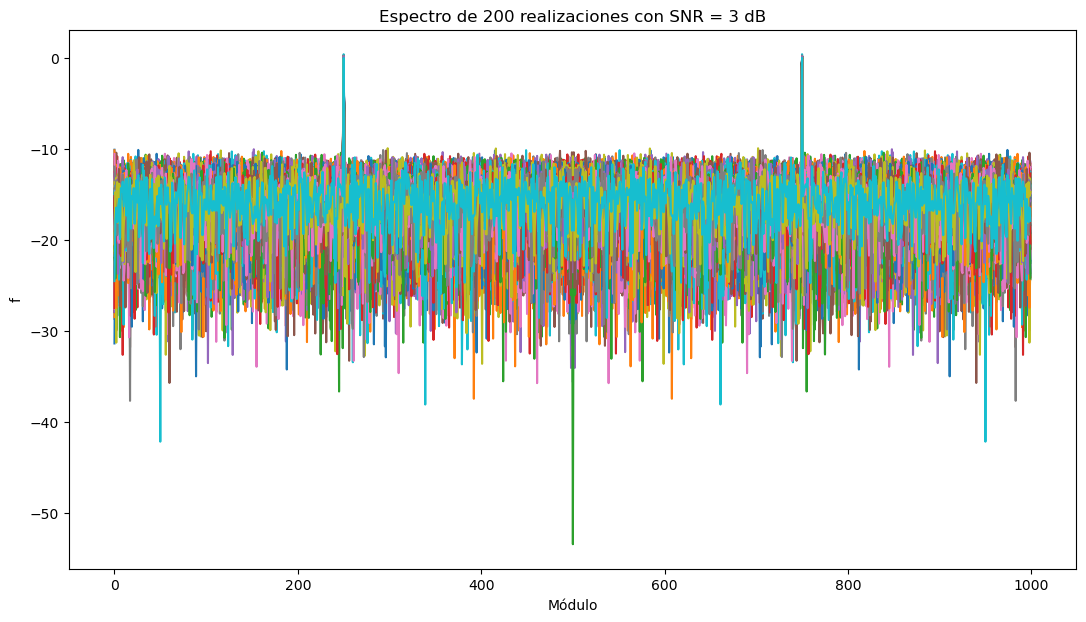

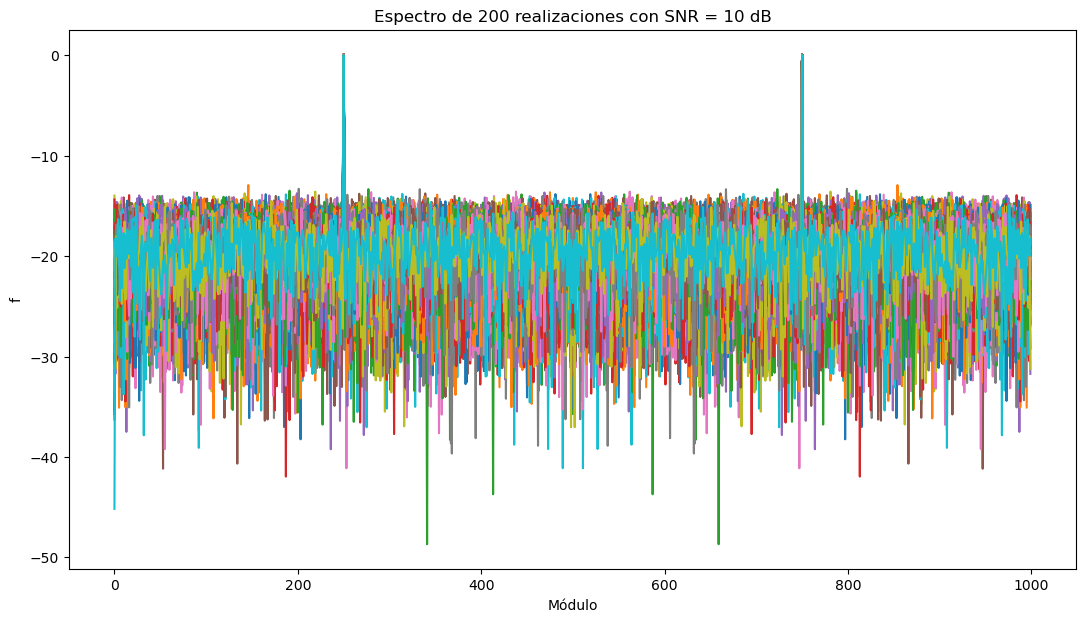

In [14]:
for snr in SNR_db:
    SNR = 10**(snr/10)  #SNR en veces
    
    for i in range(R):
        W = w1[i]
        s[:, i] = a1*np.sin(W*k)                        #Generación de señal senoidal
        n[:, i] = np.random.normal(0, np.sqrt(((a1**2)/2)/SNR), N)     #Ruido aleatorio analógico
    
    x = s + n   #Señal con ruido
    
    f = np.arange(0, fs, 1)             #Vector de frecuencias
    ft_X = np.fft.fft(x, axis=0)/N      #Espectro

    plt.figure()
    plt.plot(f, 10*np.log10(np.abs(ft_X)))
    plt.title(f'Espectro de 200 realizaciones con SNR = {snr} dB')
    plt.xlabel('Módulo')
    plt.ylabel('f')

### Cálculo de estimador de Módulo.

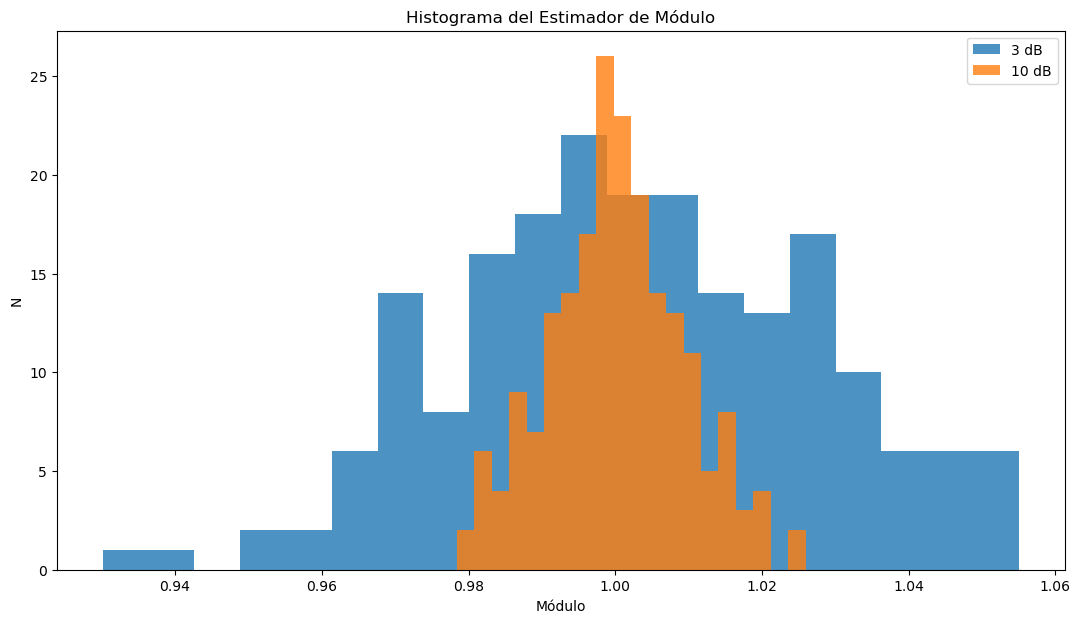

In [15]:
for snr in SNR_db:
    SNR = 10**(snr/10)  #SNR en veces
    
    for i in range(R):
        W = w1[i]
        s[:, i] = a1*np.sin(W*k)                        #Generación de señal senoidal
        n[:, i] = np.random.normal(0, np.sqrt(((a1**2)/2)/SNR), N)     #Ruido aleatorio analógico
    
    x = s + n   #Señal con ruido
    
    f = np.arange(0, fs, 1)             #Vector de frecuencias
    ft_X = np.fft.fft(x, axis=0)/N      #Espectro
    
    a = np.abs(ft_X[250, :])            #Estimador de módulo
    plt.hist(a, bins=20, alpha=0.8, label=f'{snr} dB')
    plt.title('Histograma del Estimador de Módulo')
    plt.xlabel('Módulo')
    plt.ylabel('N')
    plt.legend()

### Cálculo de estimador de Fase.

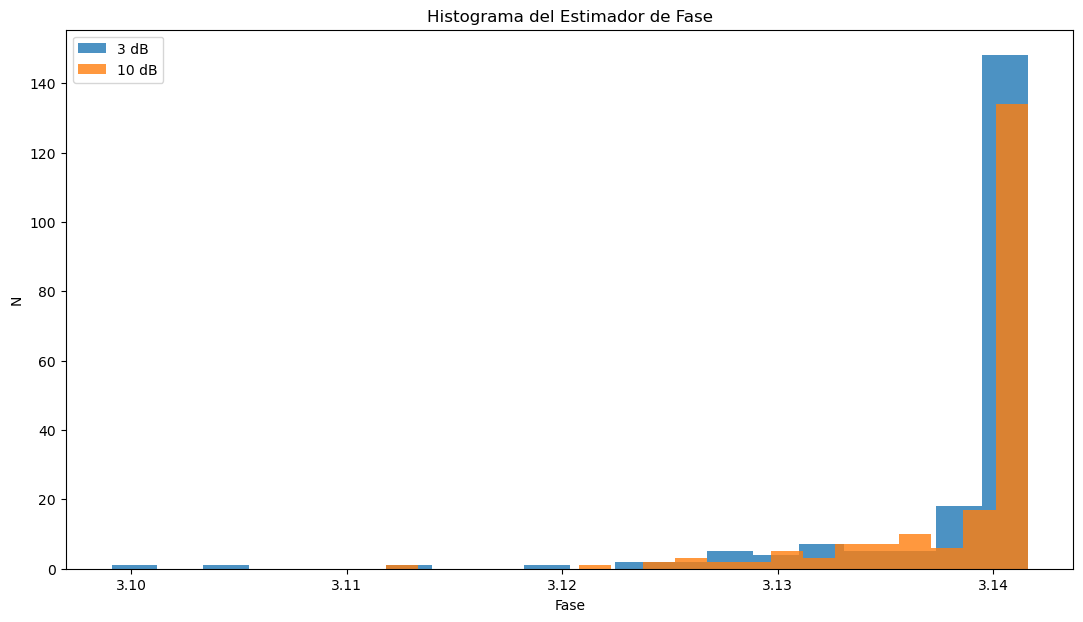

In [16]:
for snr in SNR_db:
    SNR = 10**(snr/10)  #SNR en veces
    
    for i in range(R):
        W = w1[i]
        s[:, i] = a1*np.sin(W*k)                        #Generación de señal senoidal
        n[:, i] = np.random.normal(0, np.sqrt(((a1**2)/2)/SNR), N)     #Ruido aleatorio analógico
    
    x = s + n   #Señal con ruido
    
    f = np.arange(0, fs, 1)             #Vector de frecuencias
    ft_X = np.fft.fft(x, axis=0)/N      #Espectro
    
    w = np.max(np.angle(ft_X), axis=0)  #Estimador de fase
    plt.hist(w, bins=20, alpha=0.8, label=f'{snr} dB')
    plt.title('Histograma del Estimador de Fase')
    plt.xlabel('Fase')
    plt.ylabel('N')
    plt.legend()

### Se observa que tanto en módulo como en fase ,a mayor SNR, el histograma se encuentra menos disperso, es decir, que posee menor varianza.